In [89]:
import pandas as pd
import numpy as np
from losses import rmse_loss, mse_loss
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [4]:
house_dataset = pd.read_csv("../data/ParisHousing.csv")
# house_dataset = pd.get_dummies(house_dataset, columns=['page_url', 'property_type', 'location', 'city', 'province_name', 'area', 'agency', 'Area Type', 'Area Category'])
house_dataset

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0


In [5]:
from sklearn.model_selection import train_test_split

X = house_dataset.copy()
X = X.drop(columns=["price"])
y = house_dataset["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
max_depth_list = [1, 5, 10, 15, 20, 25,  50, 100]

In [57]:
regressor = DecisionTreeRegressor(
    criterion="squared_error",
    splitter="best",
    max_depth=100,
    min_samples_split=10,
    min_samples_leaf=5,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.01,
    monotonic_cst=None,
)
regressor = regressor.fit(X_train, y_train)

In [58]:
score = regressor.score(X_test, y_test)
print(f"R^2 score: {score:.9f}")

R^2 score: 0.999996839


In [59]:
y_pred = regressor.predict(X_test)
results = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

In [67]:
print(f"MSE loss: {mse_loss(y_test, y_pred)}")

loss: 26271949.73152235


In [68]:
print(f"RMSE loss: {rmse_loss(y_test, y_pred)}")

RMSE loss: 5125.617009836216


In [44]:
results

,Actual,Predicted
507,2973362.6,2.966048e+06
90,733776.4,7.287385e+05
5933,2866459.3,2.863453e+06
7815,6187458.3,6.199281e+06
5358,9501779.0,9.495518e+06
...,...,...
5431,3852614.5,3.852866e+06
939,7673297.7,7.679321e+06
860,1710016.3,1.712218e+06
3789,3337636.7,3.340378e+06


In [95]:
def create_plots(min_samples_split_list, r2_scores, mse_losses, rmse_losses):

    fig, axs = plt.subplots(3, figsize=(10, 15))
    axs[0].plot(min_samples_split_list, r2_scores, marker='o')
    axs[0].set_title('R^2 score')
    axs[0].set_xlabel('min_samples_split')
    axs[0].set_ylabel('R^2 score')
    axs[0].grid(True)
    axs[1].plot(min_samples_split_list, mse_losses, marker='o')
    axs[1].set_title('MSE loss')
    axs[1].set_xlabel('min_samples_split')
    axs[1].set_ylabel('MSE loss')
    axs[1].grid(True)
    axs[2].plot(min_samples_split_list, rmse_losses, marker='o')
    axs[2].set_title('RMSE loss')
    axs[2].set_xlabel('min_samples_split')
    axs[2].set_ylabel('RMSE loss')
    axs[2].grid(True)
    plt.tight_layout()
    plt.show()

In [96]:
max_depth_list = [1, 5, 10, 15, 20, 25,  50, 100]

=======MAX DEPTH = 1======
R^2 score: 0.751808142
MSE loss: 2062860489484.4648
RMSE loss: 1436266.1624798048
=======MAX DEPTH = 5======
R^2 score: 0.999059642
MSE loss: 7815840373.707193
RMSE loss: 88407.24163611935
=======MAX DEPTH = 10======
R^2 score: 0.999996748
MSE loss: 27032155.576453596
RMSE loss: 5199.245673792843
=======MAX DEPTH = 15======
R^2 score: 0.999996846
MSE loss: 26214747.710255142
RMSE loss: 5120.033955967006
=======MAX DEPTH = 20======
R^2 score: 0.999996839
MSE loss: 26271949.731522437
RMSE loss: 5125.6170098362245
=======MAX DEPTH = 25======
R^2 score: 0.999996850
MSE loss: 26181985.35852083
RMSE loss: 5116.833528513589
=======MAX DEPTH = 50======
R^2 score: 0.999996857
MSE loss: 26122346.12521684
RMSE loss: 5111.002457954491
=======MAX DEPTH = 100======
R^2 score: 0.999996839
MSE loss: 26271949.731522407
RMSE loss: 5125.617009836222


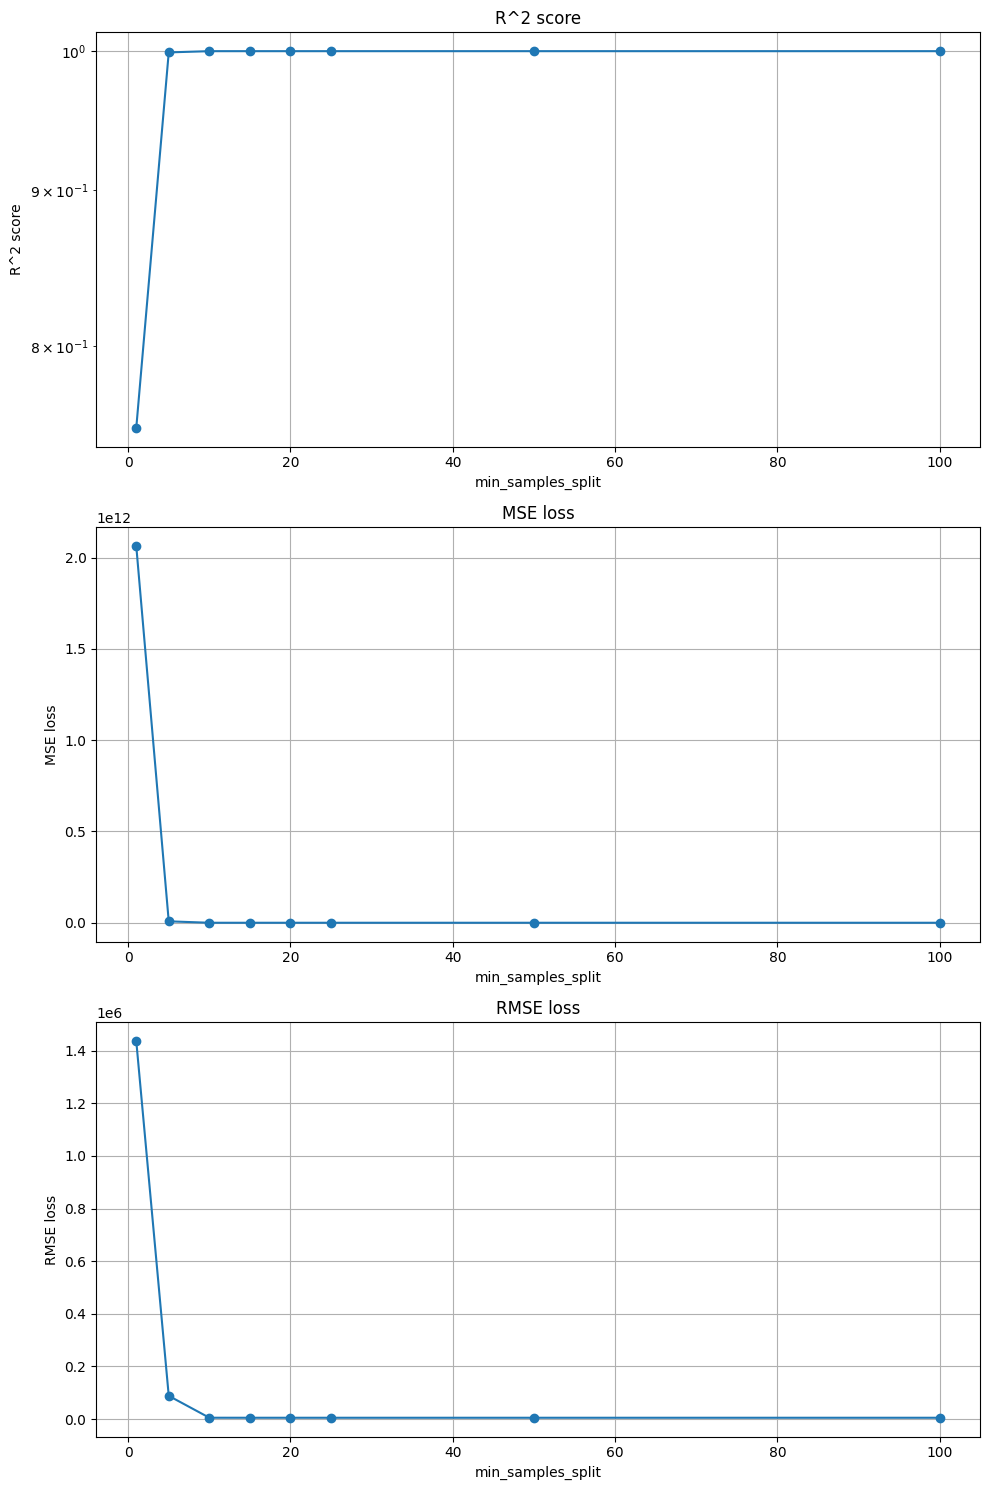

In [97]:
r2_scores = []
mse_losses = []
rmse_losses = []
for max_depth in max_depth_list:
    print(f"=======MAX DEPTH = {max_depth}======")
    regressor.max_depth = max_depth
    regressor = regressor.fit(X_train, y_train)
    score = regressor.score(X_test, y_test)
    y_pred = regressor.predict(X_test)
    mse = mse_loss(y_test, y_pred)
    rmse = rmse_loss(y_test, y_pred)
    print(f"R^2 score: {score:.9f}")
    print(f"MSE loss: {mse}")
    print(f"RMSE loss: {rmse}")
    r2_scores.append(score)
    mse_losses.append(mse)
    rmse_losses.append(rmse)
create_plots(max_depth_list, r2_scores, mse_losses, rmse_losses)

In [74]:
max_depth = 10
regressor.max_depth = max_depth

In [78]:
min_samples_split_list = [2, 5, 10, 15, 25, 50, 100]

In [79]:
for min_samples_split in min_samples_split_list:
    print(f"=======MIN SAMPLES  SPLIT= {min_samples_split}======")
    regressor.min_samples_split = min_samples_split
    regressor = regressor.fit(X_train, y_train)
    score = regressor.score(X_test, y_test)
    y_pred = regressor.predict(X_test)
    print(f"R^2 score: {score:.9f}")
    print(f"MSE loss: {mse_loss(y_test, y_pred)}")
    print(f"RMSE loss: {rmse_loss(y_test, y_pred)}")

=======MIN SAMPLES  SPLIT= 2======
R^2 score: 0.999996748
MSE loss: 27032155.576453485
RMSE loss: 5199.245673792832
=======MIN SAMPLES  SPLIT= 5======
R^2 score: 0.999996748
MSE loss: 27032155.57645356
RMSE loss: 5199.24567379284
=======MIN SAMPLES  SPLIT= 10======
R^2 score: 0.999996748
MSE loss: 27032155.57645354
RMSE loss: 5199.245673792838
=======MIN SAMPLES  SPLIT= 15======
R^2 score: 0.999996262
MSE loss: 31068131.297517467
RMSE loss: 5573.87937593894
=======MIN SAMPLES  SPLIT= 25======
R^2 score: 0.999993026
MSE loss: 57961528.34800781
RMSE loss: 7613.246899188795
=======MIN SAMPLES  SPLIT= 50======
R^2 score: 0.999981268
MSE loss: 155693281.66518617
RMSE loss: 12477.711395331524
=======MIN SAMPLES  SPLIT= 100======
R^2 score: 0.999936414
MSE loss: 528498891.04998803
RMSE loss: 22989.103746122597


In [83]:
min_samples_split = 10
regressor.min_samples_split = min_samples_split

In [84]:
min_samples_leaf_list = [2, 5, 10, 15, 25, 50, 100]

In [85]:
for min_samples_leaf in min_samples_leaf_list:
    print(f"=======MIN SAMPLES  LEAF= {min_samples_leaf}======")
    regressor.min_samples_leaf = min_samples_leaf
    regressor = regressor.fit(X_train, y_train)
    score = regressor.score(X_test, y_test)
    y_pred = regressor.predict(X_test)
    print(f"R^2 score: {score:.9f}")
    print(f"MSE loss: {mse_loss(y_test, y_pred)}")
    print(f"RMSE loss: {rmse_loss(y_test, y_pred)}")

=======MIN SAMPLES  LEAF= 2======
R^2 score: 0.999996772
MSE loss: 26827784.4283953
RMSE loss: 5179.5544623447395
=======MIN SAMPLES  LEAF= 5======
R^2 score: 0.999996748
MSE loss: 27032155.57645359
RMSE loss: 5199.245673792842
=======MIN SAMPLES  LEAF= 10======
R^2 score: 0.999994835
MSE loss: 42929955.01376506
RMSE loss: 6552.0954673879
=======MIN SAMPLES  LEAF= 15======
R^2 score: 0.999990194
MSE loss: 81500506.93715644
RMSE loss: 9027.763119242576
=======MIN SAMPLES  LEAF= 25======
R^2 score: 0.999981234
MSE loss: 155977689.54399097
RMSE loss: 12489.102831828674
=======MIN SAMPLES  LEAF= 50======
R^2 score: 0.999936411
MSE loss: 528523549.17665964
RMSE loss: 22989.640040171565
=======MIN SAMPLES  LEAF= 100======
R^2 score: 0.999749562
MSE loss: 2081526160.1499507
RMSE loss: 45623.74557343961


In [86]:
min_samples_leaf = 5
regressor.min_samples_leaf = min_samples_leaf

In [87]:
strategies = ["random", "best"]

In [88]:
for strategy in strategies:
    print(f"=======Strategy= {strategy}======")
    regressor.splitter = strategy
    regressor = regressor.fit(X_train, y_train)
    score = regressor.score(X_test, y_test)
    y_pred = regressor.predict(X_test)
    print(f"R^2 score: {score:.9f}")
    print(f"MSE loss: {mse_loss(y_test, y_pred)}")
    print(f"RMSE loss: {rmse_loss(y_test, y_pred)}")

=======Strategy= random======
R^2 score: 0.999394705
MSE loss: 5030939054.20405
RMSE loss: 70929.1128818347
=======Strategy= best======
R^2 score: 0.999996748
MSE loss: 27032155.576453697
RMSE loss: 5199.245673792853
